In [93]:
import pandas as pd
import numpy as np

### 파일 불러오기

In [94]:
data = pd.read_excel("data/data_weather.xlsx")
data.head()

,타임스탬프,귀하의 성별은 무엇입니까?,귀하의 연령대는 무엇입니까?,귀하의 거주 지역은 어디입니까?,오늘 기분은 어떠십니까?,1순위 음식 분야,2순위 음식 분야,3순위 음식 분류,1_한식,2_한식,...,2_일식,3_일식,1_중식,2_중식,3_중식,기온(°C),강수량(mm),습도(%),현지기압(hPa),전운량(10분위)
0,2021-05-16-14,남자,청년 (만 19세~만 34세 이하),"수도권 (경기, 인천)",행복하다 · 즐겁다 · 신난다,한식,일식,중식,"불고기, 김치찌개",NaN,...,"돈가스, 초밥",NaN,NaN,NaN,짬뽕,17.5,1.6,99.1,993.6,10
1,2021-05-16-15,여자,중장년 (만 35세~만 64세 이하),서울,화가 난다 · 짜증난다,한식,중식,일식,불고기,NaN,...,NaN,메밀소바,NaN,볶음밥,NaN,18.5,1.4,97.0,989.6,10
2,2021-05-16-15,남자,청년 (만 19세~만 34세 이하),서울,아무 생각 없다,일식,양식,한식,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.5,1.4,97.0,989.6,10
3,2021-05-16-15,여자,청년 (만 19세~만 34세 이하),서울,행복하다 · 즐겁다 · 신난다,일식,한식,분식,NaN,비빔밥,...,NaN,NaN,NaN,NaN,NaN,18.5,1.4,97.0,989.6,10
4,2021-05-16-16,남자,청년 (만 19세~만 34세 이하),경상도,행복하다 · 즐겁다 · 신난다,양식,일식,분식,NaN,NaN,...,"돈가스, 초밥",NaN,NaN,NaN,NaN,20.6,2.6,94.7,990.5,10


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   타임스탬프              151 non-null    object 
 1   귀하의 성별은 무엇입니까?     151 non-null    object 
 2   귀하의 연령대는 무엇입니까?    151 non-null    object 
 3   귀하의 거주 지역은 어디입니까?  151 non-null    object 
 4   오늘 기분은 어떠십니까?      151 non-null    object 
 5   1순위 음식 분야          151 non-null    object 
 6   2순위 음식 분야          151 non-null    object 
 7   3순위 음식 분류          151 non-null    object 
 8   1_한식               58 non-null     object 
 9   2_한식               35 non-null     object 
 10  3_한식               32 non-null     object 
 11  1_분식               13 non-null     object 
 12  2_분식               15 non-null     object 
 13  3_분식               23 non-null     object 
 14  1_양식               35 non-null     object 
 15  2_양식               33 non-null     object 
 16  3_양식               31 non-

# 전처리

In [96]:
# 결측치 확인
data.isnull().sum()

타임스탬프                  0
귀하의 성별은 무엇입니까?         0
귀하의 연령대는 무엇입니까?        0
귀하의 거주 지역은 어디입니까?      0
오늘 기분은 어떠십니까?          0
1순위 음식 분야              0
2순위 음식 분야              0
3순위 음식 분류              0
1_한식                  93
2_한식                 116
3_한식                 119
1_분식                 138
2_분식                 136
3_분식                 128
1_양식                 116
2_양식                 118
3_양식                 120
1_일식                 122
2_일식                 116
3_일식                 115
1_중식                 135
2_중식                 118
3_중식                 122
기온(°C)                 0
강수량(mm)                0
습도(%)                  0
현지기압(hPa)              0
전운량(10분위)              0
dtype: int64

### 컬럼명 변경

In [97]:
data.columns

Index(['타임스탬프', '귀하의 성별은 무엇입니까?', '귀하의 연령대는 무엇입니까?', '귀하의 거주 지역은 어디입니까?',
       '오늘 기분은 어떠십니까?', '1순위 음식 분야', '2순위 음식 분야', '3순위 음식 분류', '1_한식', '2_한식',
       '3_한식', '1_분식', '2_분식', '3_분식', '1_양식', '2_양식', '3_양식', '1_일식', '2_일식',
       '3_일식', '1_중식', '2_중식', '3_중식', '기온(°C)', '강수량(mm)', '습도(%)',
       '현지기압(hPa)', '전운량(10분위)'],
      dtype='object')

In [98]:
data.rename(columns={'타임스탬프':'시간대',
                     '귀하의 성별은 무엇입니까?':'성별',
                     '귀하의 연령대는 무엇입니까?':'연령대',
                     '귀하의 거주 지역은 어디입니까?':'지역',
                     '오늘 기분은 어떠십니까?':'기분',
                     '1순위 음식 분야':'1순위',
                     '2순위 음식 분야':'2순위',
                     '3순위 음식 분류':'3순위',
                     '기온(°C)':'기온',
                     '강수량(mm)':'강수량',
                     '습도(%)':'습도',
                     '현지기압(hPa)':'기압',
                     '전운량(10분위)':'전운량'}, inplace=True)

In [99]:
data.head()

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,1_한식,2_한식,...,2_일식,3_일식,1_중식,2_중식,3_중식,기온,강수량,습도,기압,전운량
0,2021-05-16-14,남자,청년 (만 19세~만 34세 이하),"수도권 (경기, 인천)",행복하다 · 즐겁다 · 신난다,한식,일식,중식,"불고기, 김치찌개",NaN,...,"돈가스, 초밥",NaN,NaN,NaN,짬뽕,17.5,1.6,99.1,993.6,10
1,2021-05-16-15,여자,중장년 (만 35세~만 64세 이하),서울,화가 난다 · 짜증난다,한식,중식,일식,불고기,NaN,...,NaN,메밀소바,NaN,볶음밥,NaN,18.5,1.4,97.0,989.6,10
2,2021-05-16-15,남자,청년 (만 19세~만 34세 이하),서울,아무 생각 없다,일식,양식,한식,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.5,1.4,97.0,989.6,10
3,2021-05-16-15,여자,청년 (만 19세~만 34세 이하),서울,행복하다 · 즐겁다 · 신난다,일식,한식,분식,NaN,비빔밥,...,NaN,NaN,NaN,NaN,NaN,18.5,1.4,97.0,989.6,10
4,2021-05-16-16,남자,청년 (만 19세~만 34세 이하),경상도,행복하다 · 즐겁다 · 신난다,양식,일식,분식,NaN,NaN,...,"돈가스, 초밥",NaN,NaN,NaN,NaN,20.6,2.6,94.7,990.5,10


### 날짜, 시간 열 추가

In [100]:
# data['시간대'] = pd.to_datetime(data['시간대'])

In [101]:
# data['월'] = data['시간'].dt.month
# data['일'] = data['시간'].dt.day
# data['시'] = data['시간'].dt.hour
# data['분'] = data['시간'].dt.minute

In [102]:
# data['날짜'] = data['시간대'].dt.strftime('%m-%d')
# data['시간'] = data['시간대'].dt.strftime('%H')

### 입력 데이터 값 전처리

In [103]:
data.loc[(data['지역']=='수도권 (경기, 인천)'), '지역'] = '수도권'
data.loc[(data['연령대']=='청소년 (~만 19세 미만)'), '연령대'] = '청소년'
data.loc[(data['연령대']=='청년 (만 19세~만 34세 이하)'), '연령대'] = '청년'
data.loc[(data['연령대']=='중장년 (만 35세~만 64세 이하)'), '연령대'] = '중장년'
data.loc[(data['연령대']=='노년 (만 65세 이상)'), '연령대'] = '노년'

In [104]:
data.loc[(data['기분']=='행복하다 · 즐겁다 · 신난다'), '기분'] = '행복'
data.loc[(data['기분']=='화가 난다 · 짜증난다'), '기분'] = '분노'
data.loc[(data['기분']=='아무 생각 없다'), '기분'] = '중립'
data.loc[(data['기분']=='우울하다 · 피곤하다 · 힘들다'), '기분'] = '우울'

In [105]:
data.head()

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,1_한식,2_한식,...,2_일식,3_일식,1_중식,2_중식,3_중식,기온,강수량,습도,기압,전운량
0,2021-05-16-14,남자,청년,수도권,행복,한식,일식,중식,"불고기, 김치찌개",NaN,...,"돈가스, 초밥",NaN,NaN,NaN,짬뽕,17.5,1.6,99.1,993.6,10
1,2021-05-16-15,여자,중장년,서울,분노,한식,중식,일식,불고기,NaN,...,NaN,메밀소바,NaN,볶음밥,NaN,18.5,1.4,97.0,989.6,10
2,2021-05-16-15,남자,청년,서울,중립,일식,양식,한식,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18.5,1.4,97.0,989.6,10
3,2021-05-16-15,여자,청년,서울,행복,일식,한식,분식,NaN,비빔밥,...,NaN,NaN,NaN,NaN,NaN,18.5,1.4,97.0,989.6,10
4,2021-05-16-16,남자,청년,경상도,행복,양식,일식,분식,NaN,NaN,...,"돈가스, 초밥",NaN,NaN,NaN,NaN,20.6,2.6,94.7,990.5,10


# 더미화 (One-Hot Encoding)

In [106]:
# 사용자가 선택한 메뉴만 뽑아내어 split 하는 Code

menu_data = data.iloc[:, 8:23]

for i in range(len(menu_data)):
    menu_data.iloc[i] = menu_data.iloc[i].str.split(', ')
    
menu_data

,1_한식,2_한식,3_한식,1_분식,2_분식,3_분식,1_양식,2_양식,3_양식,1_일식,2_일식,3_일식,1_중식,2_중식,3_중식
0,"[불고기, 김치찌개]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[돈가스, 초밥]",NaN,NaN,NaN,[짬뽕]
1,[불고기],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[메밀소바],NaN,[볶음밥],NaN
2,NaN,NaN,"[불고기, 김치찌개]",NaN,NaN,NaN,NaN,[스테이크],NaN,"[돈가스, 메밀소바]",NaN,NaN,NaN,NaN,NaN
3,NaN,[비빔밥],NaN,NaN,NaN,[떡볶이],NaN,NaN,NaN,[초밥],NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,[떡볶이],[햄버거],NaN,NaN,NaN,"[돈가스, 초밥]",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,"[비빔밥, 된장찌개]",NaN,NaN,NaN,NaN,NaN,NaN,"[파스타, 스테이크]",NaN,NaN,NaN,"[초밥, 메밀소바]",NaN,NaN,NaN
147,"[비빔밥, 불고기]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,[파스타],NaN,[우동],NaN,NaN,NaN,NaN
148,NaN,[김치찌개],NaN,[떡볶이],NaN,NaN,NaN,NaN,[스테이크],NaN,NaN,NaN,NaN,NaN,NaN
149,NaN,NaN,"[비빔밥, 불고기, 된장찌개]",NaN,NaN,NaN,NaN,[햄버거],NaN,NaN,NaN,NaN,[짜장면],NaN,NaN


In [107]:
# 각 행의 메뉴를 한 리스트로 합치고, 이를 각 행 번호를 key로 갖는 딕셔너리로 만드는 Code

tmp_list = []
menu_dic = {}

for i in range(len(menu_data)):
    temp = menu_data.loc[i]
    for j in range(len(temp)):
        
        if type(temp.iloc[j]) == list:
            
            tmp_list += temp.iloc[j]
    
    menu_dic[i] = tmp_list
    tmp_list = []

In [108]:
# 각 카테고리에 해당하는 메뉴는 처음에 0으로 만들고,
## 사용자가 선택한 데이터를 1로 만드는 Code

category_dic = {'한식': ['불고기', '냉면', '칼국수', '된장찌개', '비빔밥', '김치찌개'],
          '분식': ['떡볶이', '김밥'],
          '양식': ['파스타', '스테이크', '햄버거'],
          '일식': ['초밥', '우동', '메밀소바', '돈가스'],
          '중식': ['볶음밥', '짬뽕', '짜장면']}

menu_list = ['불고기', '냉면', '칼국수', '된장찌개', '비빔밥', '김치찌개', '떡볶이', '김밥', '파스타',
'스테이크', '햄버거', '초밥', '우동', '메밀소바', '돈가스', '볶음밥', '짜장면', '짬뽕']

result_df = pd.DataFrame(columns=menu_list)

for i in range(len(data)):
    result_df.loc[i, category_dic[data.loc[i, '1순위']]] = 0 
    result_df.loc[i, category_dic[data.loc[i, '2순위']]] = 0 
    result_df.loc[i, category_dic[data.loc[i, '3순위']]] = 0 
    
    result_df.loc[i, menu_dic[i]] = 1
     
result_df

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
0,1,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1,0,0,1,0,0,1
1,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,1,0,1,0,0
2,1,0,0,0,0,1,NaN,NaN,0,1,0,0,0,1,1,NaN,NaN,NaN
3,0,0,0,0,1,0,1,0,NaN,NaN,NaN,1,0,0,0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,1,0,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0,0,0,1,1,0,NaN,NaN,1,1,0,1,0,1,0,NaN,NaN,NaN
147,1,0,0,0,1,0,NaN,NaN,1,0,0,0,1,0,0,NaN,NaN,NaN
148,0,0,0,0,0,1,1,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,1,0,0,1,1,0,NaN,NaN,0,0,1,NaN,NaN,NaN,NaN,0,1,0


In [109]:
result_df.count()

불고기     120
냉면      120
칼국수     120
된장찌개    120
비빔밥     120
김치찌개    120
떡볶이      50
김밥       50
파스타      97
스테이크     97
햄버거      97
초밥       98
우동       98
메밀소바     98
돈가스      98
볶음밥      78
짜장면      78
짬뽕       78
dtype: int64

In [110]:
result_df

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
0,1,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1,0,0,1,0,0,1
1,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,1,0,1,0,0
2,1,0,0,0,0,1,NaN,NaN,0,1,0,0,0,1,1,NaN,NaN,NaN
3,0,0,0,0,1,0,1,0,NaN,NaN,NaN,1,0,0,0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,1,0,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0,0,0,1,1,0,NaN,NaN,1,1,0,1,0,1,0,NaN,NaN,NaN
147,1,0,0,0,1,0,NaN,NaN,1,0,0,0,1,0,0,NaN,NaN,NaN
148,0,0,0,0,0,1,1,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,1,0,0,1,1,0,NaN,NaN,0,0,1,NaN,NaN,NaN,NaN,0,1,0


## 최종 dataset 만들기

In [111]:
info = data.iloc[:, :8]
info

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위
0,2021-05-16-14,남자,청년,수도권,행복,한식,일식,중식
1,2021-05-16-15,여자,중장년,서울,분노,한식,중식,일식
2,2021-05-16-15,남자,청년,서울,중립,일식,양식,한식
3,2021-05-16-15,여자,청년,서울,행복,일식,한식,분식
4,2021-05-16-16,남자,청년,경상도,행복,양식,일식,분식
...,...,...,...,...,...,...,...,...
146,2021-05-16-23,남자,청년,충청도,행복,한식,양식,일식
147,2021-05-17-02,여자,청년,경상도,중립,한식,일식,양식
148,2021-05-17-07,남자,청소년,경상도,행복,분식,한식,양식
149,2021-05-17-07,남자,청소년,경상도,중립,중식,양식,한식


In [112]:
weather = data.iloc[:, -5:]
weather

,기온,강수량,습도,기압,전운량
0,17.5,1.6,99.1,993.6,10
1,18.5,1.4,97.0,989.6,10
2,18.5,1.4,97.0,989.6,10
3,18.5,1.4,97.0,989.6,10
4,20.6,2.6,94.7,990.5,10
...,...,...,...,...,...
146,17.1,0.4,96.0,990.2,8
147,16.7,0.5,95.6,992.6,8
148,15.9,0.2,95.4,994.5,8
149,15.9,0.2,95.4,994.5,8


### 필요한 컬럼만 concat

In [113]:
d1 = pd.concat([info, weather], axis=1)

In [114]:
final_data = pd.concat([d1, result_df], axis=1)

In [115]:
final_data['시간대']

0      2021-05-16-14
1      2021-05-16-15
2      2021-05-16-15
3      2021-05-16-15
4      2021-05-16-16
           ...      
146    2021-05-16-23
147    2021-05-17-02
148    2021-05-17-07
149    2021-05-17-07
150    2021-05-17-07
Name: 시간대, Length: 151, dtype: object

In [116]:
# 시간대를 datetime 타입으로 변경

final_data['시간대'] = pd.to_datetime(final_data['시간대'])

In [117]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   시간대     151 non-null    datetime64[ns]
 1   성별      151 non-null    object        
 2   연령대     151 non-null    object        
 3   지역      151 non-null    object        
 4   기분      151 non-null    object        
 5   1순위     151 non-null    object        
 6   2순위     151 non-null    object        
 7   3순위     151 non-null    object        
 8   기온      151 non-null    float64       
 9   강수량     151 non-null    float64       
 10  습도      151 non-null    float64       
 11  기압      151 non-null    float64       
 12  전운량     151 non-null    int64         
 13  불고기     120 non-null    object        
 14  냉면      120 non-null    object        
 15  칼국수     120 non-null    object        
 16  된장찌개    120 non-null    object        
 17  비빔밥     120 non-null    object        
 18  김치찌개    12

### 날짜, 시간, 요일 컬럼 추가

In [118]:
final_data['날짜'] = final_data['시간대'].dt.strftime('%m-%d')
final_data['시간'] = final_data['시간대'].dt.strftime('%H')
final_data['요일'] = final_data['시간대'].dt.dayofweek

In [119]:
final_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕,날짜,시간,요일
0,2021-05-16 14:00:00,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,...,1,0,0,1,0,0,1,05-16,14,6
1,2021-05-16 15:00:00,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,...,0,0,1,0,1,0,0,05-16,15,6
2,2021-05-16 15:00:00,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,...,0,0,1,1,NaN,NaN,NaN,05-16,15,6
3,2021-05-16 15:00:00,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,...,1,0,0,0,NaN,NaN,NaN,05-16,15,6
4,2021-05-16 16:00:00,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,...,1,0,0,1,NaN,NaN,NaN,05-16,16,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2021-05-16 23:00:00,남자,청년,충청도,행복,한식,양식,일식,17.1,0.4,...,1,0,1,0,NaN,NaN,NaN,05-16,23,6
147,2021-05-17 02:00:00,여자,청년,경상도,중립,한식,일식,양식,16.7,0.5,...,0,1,0,0,NaN,NaN,NaN,05-17,02,0
148,2021-05-17 07:00:00,남자,청소년,경상도,행복,분식,한식,양식,15.9,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05-17,07,0
149,2021-05-17 07:00:00,남자,청소년,경상도,중립,중식,양식,한식,15.9,0.2,...,NaN,NaN,NaN,NaN,0,1,0,05-17,07,0


### 요일을 한글로 변경

In [120]:
weekday = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}

final_data.replace({'요일':weekday}, inplace=True)

In [121]:
final_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕,날짜,시간,요일
0,2021-05-16 14:00:00,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,...,1,0,0,1,0,0,1,05-16,14,일
1,2021-05-16 15:00:00,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,...,0,0,1,0,1,0,0,05-16,15,일
2,2021-05-16 15:00:00,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,...,0,0,1,1,NaN,NaN,NaN,05-16,15,일
3,2021-05-16 15:00:00,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,...,1,0,0,0,NaN,NaN,NaN,05-16,15,일
4,2021-05-16 16:00:00,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,...,1,0,0,1,NaN,NaN,NaN,05-16,16,일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2021-05-16 23:00:00,남자,청년,충청도,행복,한식,양식,일식,17.1,0.4,...,1,0,1,0,NaN,NaN,NaN,05-16,23,일
147,2021-05-17 02:00:00,여자,청년,경상도,중립,한식,일식,양식,16.7,0.5,...,0,1,0,0,NaN,NaN,NaN,05-17,02,월
148,2021-05-17 07:00:00,남자,청소년,경상도,행복,분식,한식,양식,15.9,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,05-17,07,월
149,2021-05-17 07:00:00,남자,청소년,경상도,중립,중식,양식,한식,15.9,0.2,...,NaN,NaN,NaN,NaN,0,1,0,05-17,07,월


### 최종 dataset 저장

In [122]:
final_data.to_csv('data/final_data.csv')

# EDA

In [123]:
demo = data.iloc[:, 1:3]

In [124]:
demo

,성별,연령대
0,남자,청년
1,여자,중장년
2,남자,청년
3,여자,청년
4,남자,청년
...,...,...
146,남자,청년
147,여자,청년
148,남자,청소년
149,남자,청소년


In [125]:
demod = pd.get_dummies(demo)

In [126]:
demod

,성별_남자,성별_여자,연령대_노년,연령대_중장년,연령대_청년,연령대_청소년
0,1,0,0,0,1,0
1,0,1,0,1,0,0
2,1,0,0,0,1,0
3,0,1,0,0,1,0
4,1,0,0,0,1,0
...,...,...,...,...,...,...
146,1,0,0,0,1,0
147,0,1,0,0,1,0
148,1,0,0,0,0,1
149,1,0,0,0,0,1


In [127]:
demodp = demod.corr(method='pearson')
demodp

,성별_남자,성별_여자,연령대_노년,연령대_중장년,연령대_청년,연령대_청소년
성별_남자,1.000000,-1.000000,-0.148645,-0.203187,-0.372887,0.504983
성별_여자,-1.000000,1.000000,0.148645,0.203187,0.372887,-0.504983
연령대_노년,-0.148645,0.148645,1.000000,-0.026101,-0.064480,-0.084400
연령대_중장년,-0.203187,0.203187,-0.026101,1.000000,-0.252451,-0.330438
연령대_청년,-0.372887,0.372887,-0.064480,-0.252451,1.000000,-0.816316
연령대_청소년,0.504983,-0.504983,-0.084400,-0.330438,-0.816316,1.000000


<AxesSubplot:>

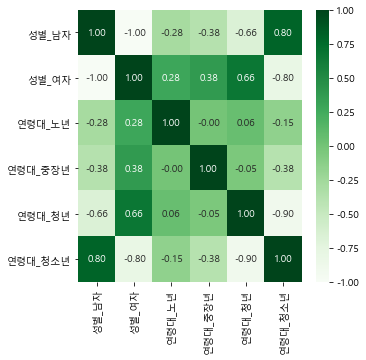

In [128]:
# 한글 문제 해결
# matplotlib의 기본폰트에서 한글이 지원되지 않음
# 시스템별로 한글 지원하는 폰트로 변경해야 함
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')
sns.heatmap(demodp.corr(),
           annot = True,
           fmt = '.2f',
           cmap = 'Greens',
           vmin = -1, vmax=1)

In [129]:
# r=-1.000 ~ r=-0.600  높은 음의 상관관계
# r=-0.599 ~ r=-0.400  중간 음의 상관관계
# r=-3.999 ~ r=-0.200  낮은 음의 상관관계
# r=-0.199 ~ r=+0.199  무상관
# r=+0.200 ~ r=+0.399  낮은 양의 상관관계
# r=+0.400 ~ r=+0.599  중간 양의 상관관계
# r=+0.600 ~ r=+1.000  높은 양의 상관관계

#### 켄달

In [130]:
import scipy.stats as stats

# kendall
stats.kendalltau(data['성별'], data['연령대'])

KendalltauResult(correlation=-0.48840421038478093, pvalue=5.521147025895211e-10)

#### 스피어만

In [131]:
# spearman
stats.spearmanr(data['성별'], data['연령대'])

SpearmanrResult(correlation=-0.50651588001241, pvalue=3.235535084309362e-11)

#### 켄달

In [132]:
corr = final_data.corr(method='kendall')

In [133]:
corr

,기온,강수량,습도,기압,전운량
기온,1.000000,0.111850,-0.673239,-0.329901,0.293440
강수량,0.111850,1.000000,-0.113238,-0.425973,0.286515
습도,-0.673239,-0.113238,1.000000,-0.016345,0.002560
기압,-0.329901,-0.425973,-0.016345,1.000000,-0.420812
전운량,0.293440,0.286515,0.002560,-0.420812,1.000000


<AxesSubplot:>

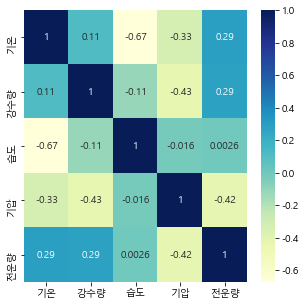

In [134]:
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="YlGnBu",
            annot=True)

#### 스피어만

In [135]:
corr2 = final_data.corr(method='spearman')

<AxesSubplot:>

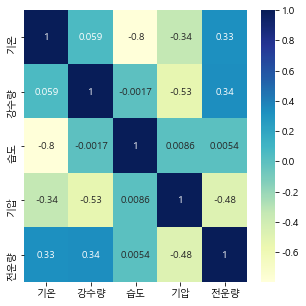

In [136]:
sns.heatmap(corr2,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="YlGnBu",
            annot=True)